# Import Libraries

In [1]:
import os
os.getcwd()

'E:\\PYTHONCLASSJUPYTER\\PrakashSenapati\\2024_10_24_Model_Tuning_RandomsearchCV_GridSearchCV'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Load and Preview Dataset

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [5]:
dataset.shape

(400, 5)

In [6]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


# Filter Independent (X) and Dependent (y) Columns

In [ ]:
# X = ['Age', 'EstimatedSalary']
# y = ['Purchased']

In [7]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [8]:
print( X.shape)
print( y.shape)

(400, 2)
(400,)


In [9]:
X[0:5]

array([[1.9e+01, 1.9e+04],
       [3.5e+01, 2.0e+04],
       [2.6e+01, 4.3e+04],
       [2.7e+01, 5.7e+04],
       [1.9e+01, 7.6e+04]])

In [10]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

# Feature Scaling

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
X.shape

(400, 2)

In [13]:
X[0:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

# Training & Testing Set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(300, 2)
(100, 2)
(300,)
(100,)


In [17]:
X_train[0:5]

array([[ 0.60603081, -0.9027491 ],
       [-0.54012675,  1.47580428],
       [ 0.03295203, -0.57973568],
       [-0.54012675,  1.91627713],
       [ 1.37013584, -1.43131652]])

In [18]:
X_test[0:5]

array([[-0.73115301,  0.50676401],
       [ 0.03295203, -0.57973568],
       [-0.25358736,  0.15438573],
       [-0.73115301,  0.27184516],
       [-0.25358736, -0.57973568]])

In [19]:
y_train[0:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [20]:
y_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

# SVC Classifier

In [21]:
svc_classifier = SVC(kernel='rbf', random_state=0)
svc_classifier.fit(X_train, y_train)

SVC(random_state=0)

**Predict X_test**

In [22]:
y_pred = svc_classifier.predict(X_test)
y_pred.shape

(100,)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

**Confusion Matrix**

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


**K-Fold Cross Validation**

In [25]:
accuracies = cross_val_score(estimator=svc_classifier, X=X_train, y=y_train, cv=10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.00 %
Standard Deviation: 6.83 %


**Normal Accuracy Score**

In [26]:
ac = accuracy_score(y_test, y_pred)
print(ac)

0.93


**Bias**

In [27]:
bias = svc_classifier.score(X_train, y_train)
bias

0.9066666666666666

**Variance**

In [28]:
variance = svc_classifier.score(X_test, y_test)
variance

0.93

# Grid Search to find the best model and the best parameters

In [31]:
parameters = [
    {
        'C': [1, 10, 100, 1000],
        'kernel': ['linear']
    },
    
    {
        'C': [1, 10, 100, 1000],
        'kernel': ['rbf'],
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    }
]

grid_search = GridSearchCV(
    estimator = svc_classifier,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10,
    n_jobs = -1
)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 91.00 %
Best Parameters: {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


In [32]:
parameters

[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 {'C': [1, 10, 100, 1000],
  'kernel': ['rbf'],
  'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [33]:
grid_search

GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

# Randomized Search

# Visualising the Training Set Results

C:\Users\RAJEEV\AppData\Local\Temp\ipykernel_6304\4055060049.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


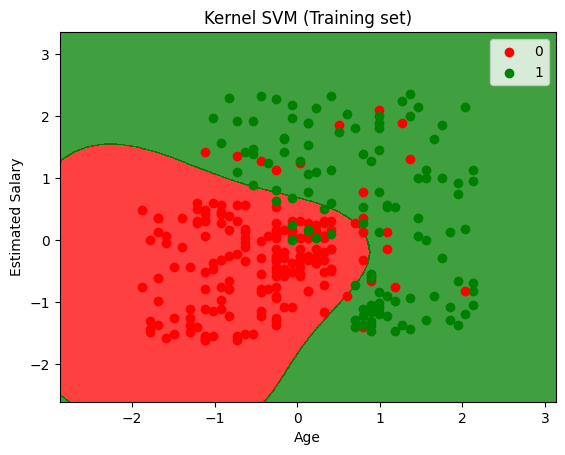

In [34]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1,
              stop = X_set[:, 0].max() + 1,
              step = 0.01
             ),
    np.arange(start = X_set[:, 1].min() - 1,
              stop = X_set[:, 1].max() + 1,
              step = 0.01
             )
)

plt.contourf(
    X1,
    X2,
    svc_classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], 
        X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i),
        label = j
    )

plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Testing Set Results

C:\Users\RAJEEV\AppData\Local\Temp\ipykernel_6304\3867252369.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


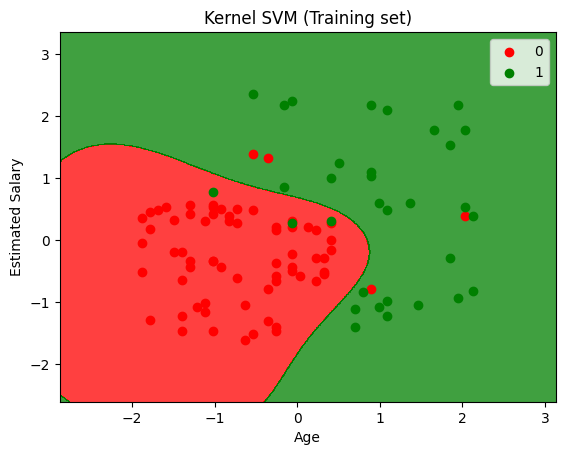

In [35]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1,
              stop = X_set[:, 0].max() + 1,
              step = 0.01
             ),
    np.arange(start = X_set[:, 1].min() - 1,
              stop = X_set[:, 1].max() + 1,
              step = 0.01
             )
)

plt.contourf(
    X1,
    X2,
    svc_classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], 
        X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i),
        label = j
    )

plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()